> 인종 차별 문제로 load_boston 할 수 없음

In [ ]:
# 보스턴 파일 불러오는 법

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# from scipy import stats

# from sklearn import datasets
# X, y = datasets.fetch_openml('boston', return_X_y=True)

# %matplotlib inline


# # boston 데이터셋 DataFrame 변환
# bostonDF = pd.DataFrame(X)
# bostonDF['PRICE'] = y

# print(bostonDF.shape)
# bostonDF.head()

> 우리는 csv 파일 다운해서 분석할 것

In [1]:
import pandas as pd

In [43]:
boston_df= pd.read_csv("C:/apps/ml_7/datasets/Boston.csv", index_col=0)

> 데이터 째려보기

In [14]:
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [32]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [16]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


> StandardScaler

> 다중 공선성 확인

    - 피처 / 타겟 값 상관관계 파악
    - seaborn의 regplot 이용하면 산점도와 선형 회귀 직선을 함께 나타내준다

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

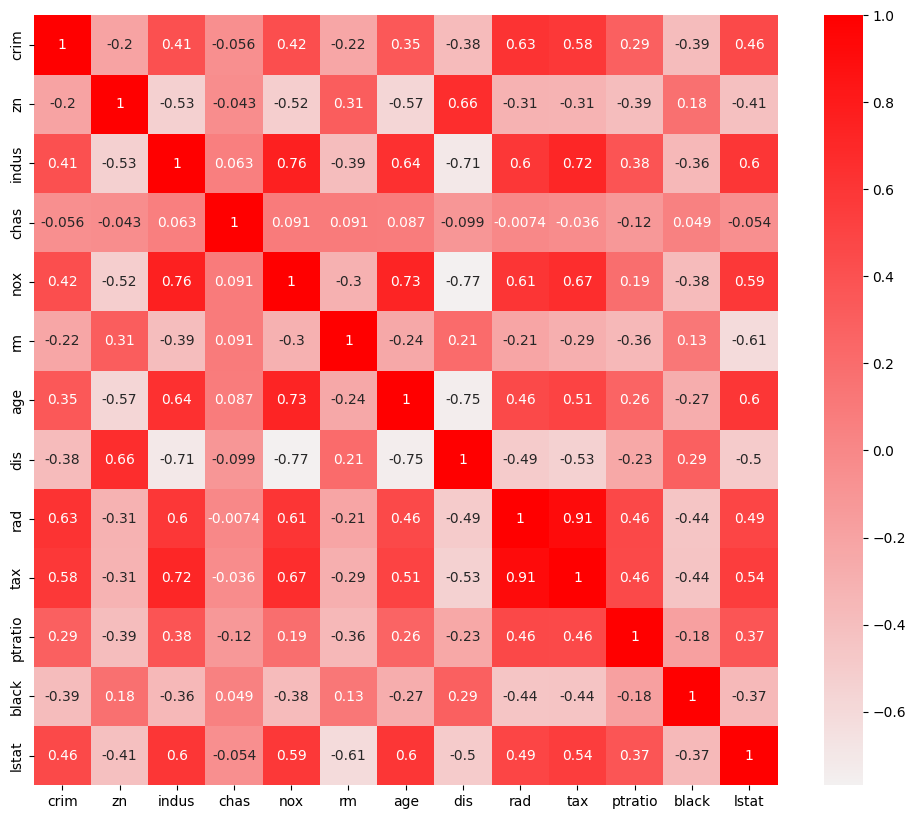

In [44]:
y_target=boston_df['medv']
X_data= boston_df.drop('medv',axis=1)

scaler=StandardScaler()
scaler.fit(X_data)
X_data_scaler= scaler.transform(X_data)                                   ## X_data standardScaling

boston_df_scaler=pd.DataFrame(data=X_data_scaler, columns=X_data.columns)
plt.figure(figsize=(12, 10))                                              ## boston_df_scaler이라는 새로운 데이터 프레임
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_scaler.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
# # 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2개의 ax를 가짐
# fig, axs = plt.subplot(figsize = (16,8), ncols = 4, nrows = 2)
# lm_features = ['rm', 'zn', 'indus', 'nox', 'age', 'ptratio', 'lstat', 'rad']

# for i , featuer in enumerate(lm_features) :
#     row = int(i/4)
#     col = i%4
#     # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
#     sns.regplot(x=feature, y='medv', data = df_boston, ax = axs[row][col])

> linear regression

> 평가

    - MSE
    - R-square

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_data_scaler,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 17.297, RMSE:4.159
Variance score:0.757


In [46]:
boston_df_scaler.drop(['tax','dis'],axis=1,inplace=True)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(boston_df_scaler,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 17.687, RMSE:4.206
Variance score:0.752


> 알고리즘 변경해보기

    - Random Forest
    - XGBoost

In [48]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_clf.fit(X_train,y_train)
y_preds2=rf_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds2)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds2):.3f}")

MSE : 8.526, RMSE:2.920
Variance score:0.880


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf= GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train,y_train)
y_preds3 = gb_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds3)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds3):.3f}")

MSE : 7.934, RMSE:2.817
Variance score:0.889


In [50]:
import xgboost as xgb ## XGBoost 불러오기

import xgboost as xgb
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
pred_probs = model.predict(X_test)

mse= mean_squared_error(y_test,pred_probs)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,pred_probs):.3f}")

MSE : 7.509, RMSE:2.740
Variance score:0.895
